In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import time
from scipy.stats import kendalltau

$ |(r_1 \cos \theta_1 - r_2 \cos \theta_2, r_1 \sin \theta_1 - r_2 \sin \theta_2)| $ \
$ |r_1 e^{i\theta_1} - r_2 e^{i\theta_2}| $



In [2]:
palette = np.array(['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:cyan',
              'tab:pink', 'gold', 'orange', 'yellowgreen', 'navy'])
MIN_SIZE_HSPOT, COEF_SIZE_HSPOT = 100, 5000
size_hspot = lambda T,Pmax: MIN_SIZE_HSPOT + COEF_SIZE_HSPOT*(T/Pmax)
PI = np.pi

def rand_thr():
    r = np.sqrt(np.random.rand())
    th = np.random.rand()
    return np.array([th, r])

class Simul:
    def __init__(self, params):
        self.P, self.Pmax = 0, params['Pmax']
        self.ell, self.mu, self.c, self.Nc = params['ell'], params['mu'], params['c'], params['Nc']
        self.div, self.hs = params['div'], params['house_size']
        self.R, self.Th = self.div[1]*self.hs, 2*PI/self.div[0]
        
        Rand = np.random.rand(self.Nc,2)
        Rand[:,1] = np.sqrt(Rand[:,1])
        self.spots = (self.div * Rand).astype(int) # 겹칠수가 있잖니?
        self.idx_hspots = np.array([],dtype=int)
        self.inhab = np.zeros((1,3),dtype=int)
        self.T = np.zeros(self.Nc)
        self.W = np.random.rand(self.Nc)
    
    def evalD(self, i, j):
        x = i[1]*np.cos(self.Th*i[0]) - j[1]*np.cos(self.Th*j[0])
        y = i[1]*np.sin(self.Th*i[0]) - j[1]*np.sin(self.Th*j[0])
        return self.hs * np.sqrt(x*x + y*y)
        
    def evalZ(self, ivec, j):
        d = self.evalD(ivec, self.spots[j])
        Z = self.W[j] - (d/self.ell)*(1 + (self.T[j]/self.c)**self.mu)
        return Z
    
    def getajob(self, ivec):
        j = 0
        Z = self.evalZ(ivec,j)
        for k in range(1, self.Nc):
            tempZ = self.evalZ(ivec,k)
            if tempZ > Z:
                j = k
                Z = tempZ
        return j
    
    def add(self):
        self.P += 1
        if self.P == self.Pmax: print('[Alert] Maximum Population Reached!')
        ivec = (self.div * rand_thr()).astype(int) # 겹칠수가 있잖니?
        j = self.getajob(ivec)
        if not j in self.idx_hspots:
            self.idx_hspots = np.append(self.idx_hspots, j)
        self.T[j] += 1
        if self.P == 1:
            self.inhab[0] = np.append(ivec,j)
        else:
            self.inhab = np.append(self.inhab, [np.append(ivec,j)], axis=0)
        return self.inhab[-1], self.spots[j]

[Alert] Maximum Population Reached!


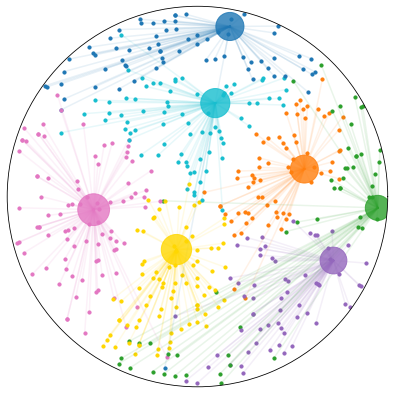

took : 20.4007670879364 [sec]
<d> = 38.96795471602184
ℓ/L 0.005


In [7]:
params = {
    'Pmax' : 500,
    'ell' : 1,
    'mu' : 2,
    'c' : 1,
    'Nc' : 7,
    'div' : (100, 100),
    'house_size' : 1
}
sim = Simul(params)
scaler = np.array([sim.Th, sim.hs])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(polar=True)
ax.set_rlim(0, sim.R)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
darr = []

flag_start = time()
for n in range(sim.Pmax):
    newfren, newjob = sim.add()
    color = palette[newfren[2]]
    darr.append(sim.evalD(newfren[:2], newjob))
    
    ax.scatter(*np.diag(scaler)@newfren[:2], s=10, c=color)
    ax.plot(*np.diag(scaler)@np.vstack((newfren[:2], newjob)).T, color=color, alpha=0.1, zorder=1)
ax.scatter(*np.diag(scaler)@sim.spots[sim.idx_hspots].T,
           c=palette[sim.idx_hspots],
           s=size_hspot(sim.T[sim.idx_hspots], sim.Pmax),
           alpha=0.8, zorder=2)
plt.show()
flag_end = time()

print('took :', flag_end - flag_start, '[sec]')
print('<d> =', np.mean(darr))
print('ℓ/L', 0.5* sim.ell / sim.R)
# print('Ltot =', sum(darr))
# print('β =', 2 - 2*np.log(sum(darr))/np.log(sim.Pmax))

In [184]:
P_ceiling = 10000

params = {
    'Pmax' : P_ceiling,
    'ell' : 0,
    'mu' : 4,
    'c' : 1,
    'Nc' : 15,
    'div' : (100,100),
    'house_size' : 0
}
Y, E = [], []
hs = [0.05, 5, 50]

for i in range(3):
    start = time()
    params['house_size'] = hs[i]
    elln_span = np.power(10, np.linspace(-5, 5, 30))
    L = 2 * params['div'][1] * params['house_size']
    rep = 100
    P0_arr = np.zeros((len(elln_span), rep))
    for i in range(rep):
        P0_stamps = []
        for ell in L*elln_span:
            params['ell'] = ell
            sim = Simul(params)
            P0 = 0
            for n in range(sim.Pmax):
                _,_ = sim.add()
                P0 = sim.P
                if len(sim.idx_hspots) > 1:
                    break
            P0_stamps.append(P0)
        penis = np.log(fuck) / np.log(10)
        P0_arr[:,i] = P0_stamps.copy()

    P0_avg = np.array([Pset.mean() for Pset in P0_arr])
    P0_std = np.array([Pset.std() for Pset in P0_arr])
    
    Y.append(P0_avg)
    E.append(P0_std)
    end = time()
    print(end-start, 'sec')

3.0991897583007812 sec
3.118056058883667 sec
3.2076423168182373 sec


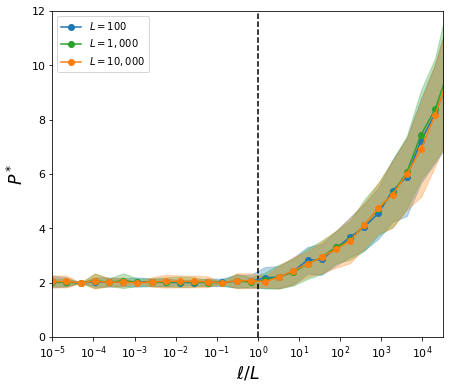

In [185]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.set_xscale('log')
ax.set_xlim(10**(-5), 10**4.5)
ax.set_ylim(0, 12)
ax.set_xlabel('$\ell / L$', fontsize='xx-large')
ax.set_ylabel('$P^*$', fontsize='xx-large')
ax.set_xticks([10**p for p in range(-5,5)])
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)

ax.axvline(x=1, c='k', ls='--')
ax.plot(elln_span, Y[0], '-o', color=palette[0], label='$L=100$')
ax.fill_between(elln_span, Y[0]-E[0], Y[0]+E[0], color=palette[0], alpha=0.3)
ax.plot(elln_span, Y[1], '-o', color=palette[1], label='$L=1,000$')
ax.fill_between(elln_span, Y[1]-E[1], Y[1]+E[1], color=palette[1], alpha=0.3)
ax.plot(elln_span, Y[2], '-o', color=palette[2], label='$L=10,000$')
ax.fill_between(elln_span, Y[2]-E[2], Y[2]+E[2], color=palette[2], alpha=0.3)

ax.legend(loc='upper left')
plt.show()

In [62]:
params = {
    'Pmax' : 50000,
    'ell' : 0,
    'mu' : 4,
    'c' : 1,
    'Nc' : 30,
    'div' : (100,100),
    'house_size' : 1
}
L = 2 * params['div'][0] * params['house_size']
rep = 10
Telln_span = np.power(10, np.linspace(-4, 4, 30))

start = time()
TY, TE = [], []
for ell in L*Telln_span:
    taus = []
    for i in range(rep):
        params['ell'] = ell
        sim = Simul(params)
        while len(sim.idx_hspots) < sim.Nc:
            sim.add()
        X = sim.W[sim.idx_hspots].copy()
        Y = np.sort(sim.W)[::-1]
        tau, pval = kendalltau(X,Y)
        taus.append(tau)
    TY.append(np.mean(taus))
    TE.append(np.std(taus))
end = time()
print(end - start, 'sec')
TY = np.array(TY)
TE = np.array(TE)

21.356414556503296 sec


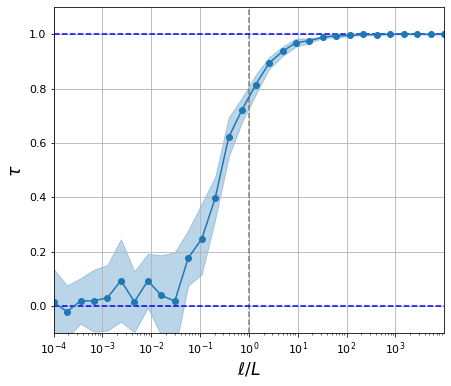

In [63]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.set_xscale('log')
ax.set_xlim(Telln_span[0], Telln_span[-1])
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$\ell / L$', fontsize='xx-large')
ax.set_ylabel('$τ$', fontsize='xx-large')
ax.set_xticks([10**p for p in range(-4,4)])
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.grid()

ax.axvline(x=1, c='gray', ls='--')
ax.axhline(y=0, c='blue', ls='--')
ax.axhline(y=1, c='blue', ls='--')
ax.plot(Telln_span, TY, '-o', color=palette[0], label='$L=0.1$')
ax.fill_between(Telln_span, TY-TE, TY+TE, color=palette[0], alpha=0.3)

plt.show()

In [188]:
params = {
    'Pmax' : 50000,
    'ell' : 0,
    'mu' : 4,
    'c' : 10,
    'Nc' : 10,
    'div' : (100,100),
    'house_size' : 0.1
}

L = 2 * params['div'][0] * params['house_size']
Delln_span = np.power(10, np.linspace(-4, 4, 20))
DY, DE = [], []

rep = 10
start = time()
for ell in L*Delln_span:
    dbarr = []
    for n in range(rep):
        params['ell'] = ell
        sim = Simul(params)
        darr = []
        while len(sim.idx_hspots) < sim.Nc:
            newfren, newjob = sim.add()
            darr.append(sim.evalD(newfren[:2], newjob))
        dbarr.append(np.mean(darr))
    DY.append(np.mean(dbarr))
    DE.append(np.std(dbarr))
end = time()

rootk = np.sqrt(params['Nc'])
DY = rootk*np.array(DY)
DE = rootk*np.array(DE)
print(end - start, '[sec]')

11.17757797241211 [sec]


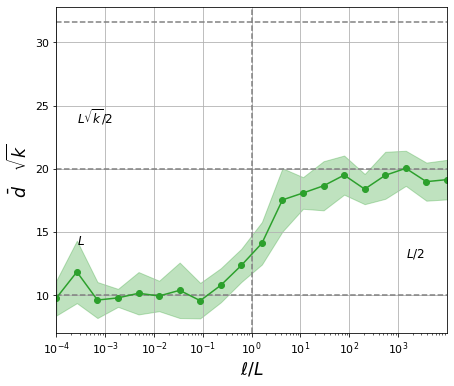

In [189]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.set_xscale('log')
ax.set_xlim(Delln_span[0], Delln_span[-1])
ax.set_xlabel('$ \\ell / L $', fontsize='xx-large')
ax.set_ylabel('$ \\bar{d} \\quad \\sqrt{k} $', fontsize='xx-large')
ax.set_xticks([10**p for p in range(-4,4)])
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.grid()

ax.axvline(x=1, c='gray', ls='--')

ax.axhline(y=L/2, c='gray', ls='--')
ax.annotate('$L/2$', (Delln_span[-3], L/2 + 3), fontsize=12)

ax.axhline(y=(L/2)*rootk, c='gray', ls='--')
ax.annotate('$L\\sqrt{k}/2$', (Delln_span[1], (L/2)*rootk - 8), fontsize=12)

ax.axhline(y=L, c='gray', ls='--')
ax.annotate('$L$', (Delln_span[1], L - 6), fontsize=12)

ax.plot(Delln_span, DY, '-o', color=palette[1])
ax.fill_between(Delln_span, DY-DE, DY+DE, color=palette[1], alpha=0.3)

plt.show()

In [190]:
params = {
    'Pmax' : 100000,
    'ell' : 10,
    'mu' : 4,
    'c' : 100,
    'Nc' : 10,
    'div' : (100,100),
    'house_size' : 1
}

L_span2 = np.power(10, np.linspace(-1, -5, 30))
DY2 = []

start = time()
for hs in 0.5 * L_span2 / params['div'][1]:
    params['house_size'] = hs
    sim = Simul(params)
    darr = []
    while len(sim.idx_hspots) < sim.Nc:
        newfren, newjob = sim.add()
        darr.append(sim.evalD(newfren[:2], newjob))
    DY2.append(np.mean(darr))
end = time()

print(end - start, '[sec]')

L_span3 = np.power(10, np.linspace(3, 8, 30))
DY3 = []

start = time()
for hs in 0.5 * L_span3 / params['div'][1]:
    params['house_size'] = hs
    sim = Simul(params)
    darr = []
    while len(sim.idx_hspots) < sim.Nc:
        newfren, newjob = sim.add()
        darr.append(sim.evalD(newfren[:2], newjob))
    DY3.append(np.mean(darr))
end = time()

print(end - start, '[sec]')

92.89228916168213 [sec]
0.32987427711486816 [sec]


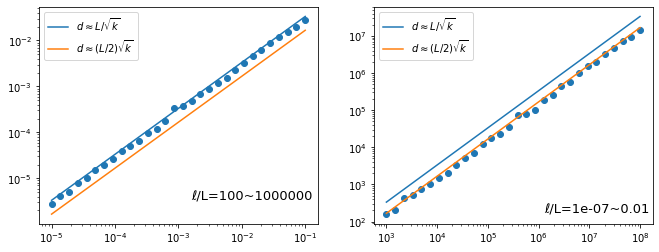

In [191]:
rootk = np.sqrt(params['Nc']-1)

fig, (ax,bx) = plt.subplots(1,2,figsize=(11,4))

ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(L_span2, np.array(DY2))

# ax.plot(L_span2, L_span2, label='$d \\approx L$')
# ax.plot(L_span2, L_span2/2, label='$d \\approx L/2$')
ax.plot(L_span2, L_span2/rootk, label='$d \\approx L/\\sqrt{k}$')
ax.plot(L_span2, L_span2/(2*rootk), label='$d \\approx (L/2) \\sqrt{k}$')

elln = params['ell'] / L_span2
elln_span = (str(int(min(elln))), str(round(max(elln))))
ax.annotate('ℓ/L='+'~'.join(elln_span), (L_span2[13], L_span2[-1]/3), fontsize=13)
ax.legend()

bx.set_xscale('log')
bx.set_yscale('log')
bx.scatter(L_span3, np.array(DY3))

# bx.plot(L_span3, L_span3, label='$d \\approx L$')
# bx.plot(L_span3, L_span3/2, label='$d \\approx L/2$')
bx.plot(L_span3, L_span3/rootk, label='$d \\approx L/\\sqrt{k}$')
bx.plot(L_span3, L_span3/(2*rootk), label='$d \\approx (L/2) \\sqrt{k}$')

elln = params['ell'] / L_span3
elln_span = (str(min(elln)), str(max(elln)))
bx.annotate('ℓ/L='+'~'.join(elln_span), (L_span3[18], L_span3[0]/6), fontsize=13)
bx.legend()

plt.show()